# Project:  Detecting Hotspots From Taxi GPS Data Using K-Means Algorithms

Objective: Understand the taxi transportation dynamics for Chengdu City. In our project, we use the k-means algorithms to do the taxi activity clustering.  

Through the project, we will do:

* Load data from a csv file using the pandas package.
* Manually set the number of the clustering centers of K-means, divide the locations into ten regions.
* Visualize result with Baidu Map API
* Plot the total number of taxis vs. the time.
* Plot the total number of taxis vs. the regions.

The result of the project provided a recommendation of road clusters to car drivers and the citizens to help them to plan their travel and avoid traffic jams.

## Loading the Data
First, we load the standard packages along with a number of sklearn sub-packages for data processing.

In [195]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import requests
import sys
from time import time
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the taxi.csv file as pandas dataframe. The data includes four attributes(TID, Lat, Lon, Time). Print out the first five lines of the data to see if it's correctly loaded.

In [106]:
#Load data
# TID: taxi id, Lat: Latitude, Lon: Longtitude, Time: hh/mm/ss
names = ['TID','Lat','Lon','Time']
df = pd.read_csv('taxi.csv',header=None,names=names)
# df.shape (814180, 4)
df.head(5)

,TID,Lat,Lon,Time
0,1,30.624806,104.136604,211846
1,1,30.624809,104.136612,211815
2,1,30.624811,104.136587,212017
3,1,30.624811,104.136596,211916
4,1,30.624811,104.136619,211744


Then convert dataframe into numpy array for further operations.

In [107]:
X = np.array(df[['TID','Lat','Lon','Time']])
Xkm = np.array(df[['Lat','Lon']])

## Run k-Means
We now run k-means to try to automatically detect clusters. First, we construct a kMeans object to perform the clustering, then fit the model with the location inforamtion.

In [108]:
km = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=1,
                verbose=False)
# print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(Xkm)
print("done in %0.3fs" % (time() - t0))

done in 5.112s


We try to divide the data into 10 clusters. We create a label for each cluster and print out the location of the centroid of it.

In [132]:
kmResult = km.cluster_centers_
print(kmResult)
kmLabels = km.labels_ 
# print(np.unique(kmLabels)) [0 1 2 3 4 5 6 7 8 9]
# print(kmLabels.shape) 

[[  30.59863186  104.06253255]
 [  30.69592695  104.10365466]
 [  30.92750363  103.62850416]
 [  30.65519407  104.06879874]
 [  30.64998798  104.01562397]
 [  30.56233081  103.97315684]
 [  30.72378298  103.87147111]
 [  30.63280206  104.11395878]
 [  30.58685161  104.31045921]
 [  30.69632574  104.03256889]]


## Show different clusters on real map
In order to get the real address of the center of each cluster from its latitude and longitude info, we used the Reverse Address Resolution supported by Baidu Map API.

In [189]:
#Reverse Address Resolution with Baidu map API
kmAddress = []
for i in range(10):
    loc = str(kmResult[i][0]) + ',' + str(kmResult[i][1])
    url = 'http://api.map.baidu.com/geocoder/v2/?location='+loc+'&output=json&pois=0&ak=6scPy4KLKcvtThBln8ZhWkanzxgILImw'
    r = requests.get(url)
    text = r.text
    start_text = 'formatted_address' 
    end_text = 'business'
    start = text.find(start_text)+20
    end = text.find(end_text) - 3
    kmAddress.append(text[start:end])
    print('region:'+str(i))
    print('address:'+text[start:end])

region:0
address:四川省成都市武侯区和盛东街
region:1
address:四川省成都市成华区高车一路
region:2
address:四川省成都市都江堰市中大街133
region:3
address:四川省成都市锦江区东桂街89号
region:4
address:四川省成都市武侯区武阳大道338号
region:5
address:四川省成都市双流县航枢大道
region:6
address:四川省成都市温江区
region:7
address:四川省成都市锦江区牛沙路5号
region:8
address:四川省成都市龙泉驿区
region:9
address:四川省成都市金牛区蜀兴北街


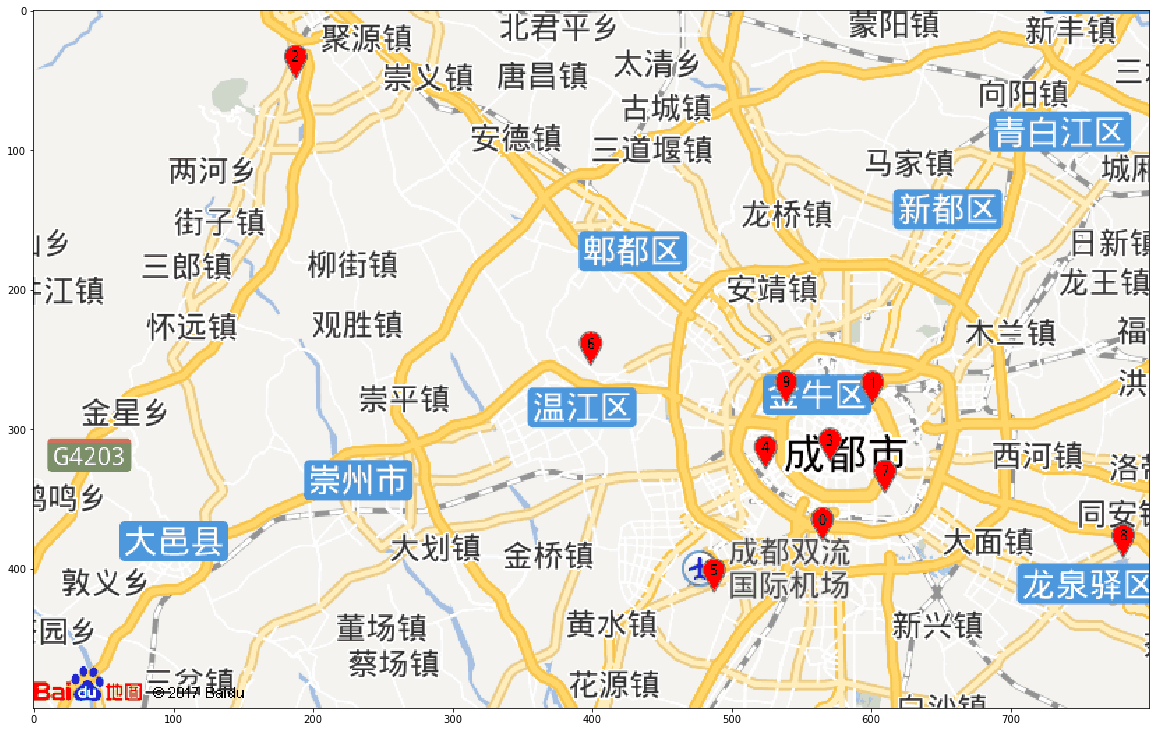

In [146]:
#show km clusters on real Chinese map, marked in red markers
# center = np.mean(kmResult,axis=0)
center = '&center='+str(kmResult[6][1])+','+str(kmResult[6][0])
markers = '&markers='
markerStyles = '&markerStyles='
for i in range(10):
    markers = markers + str(kmResult[i][1])+','+str(kmResult[i][0])
    markerStyles = markerStyles + 'm,'+str(i)
    if i != 9:
        markers = markers+'|'
        markerStyles = markerStyles+'|'
# img_src = 'http://api.map.baidu.com/staticimage/v2?ak=6scPy4KLKcvtThBln8ZhWkanzxgILImw&mcode=666666&width=700&height=400&zoom=12'+center+markers+markerStyles
img_src = 'http://api.map.baidu.com/staticimage/v2?ak=6scPy4KLKcvtThBln8ZhWkanzxgILImw&mcode=666666&width=800&height=500&zoom=11&scale=1'+center+markers+markerStyles
plt.figure(figsize=(20,15))
plt.figure(1) 
image = io.imread(img_src)
plt.imshow(image)
plt.show()

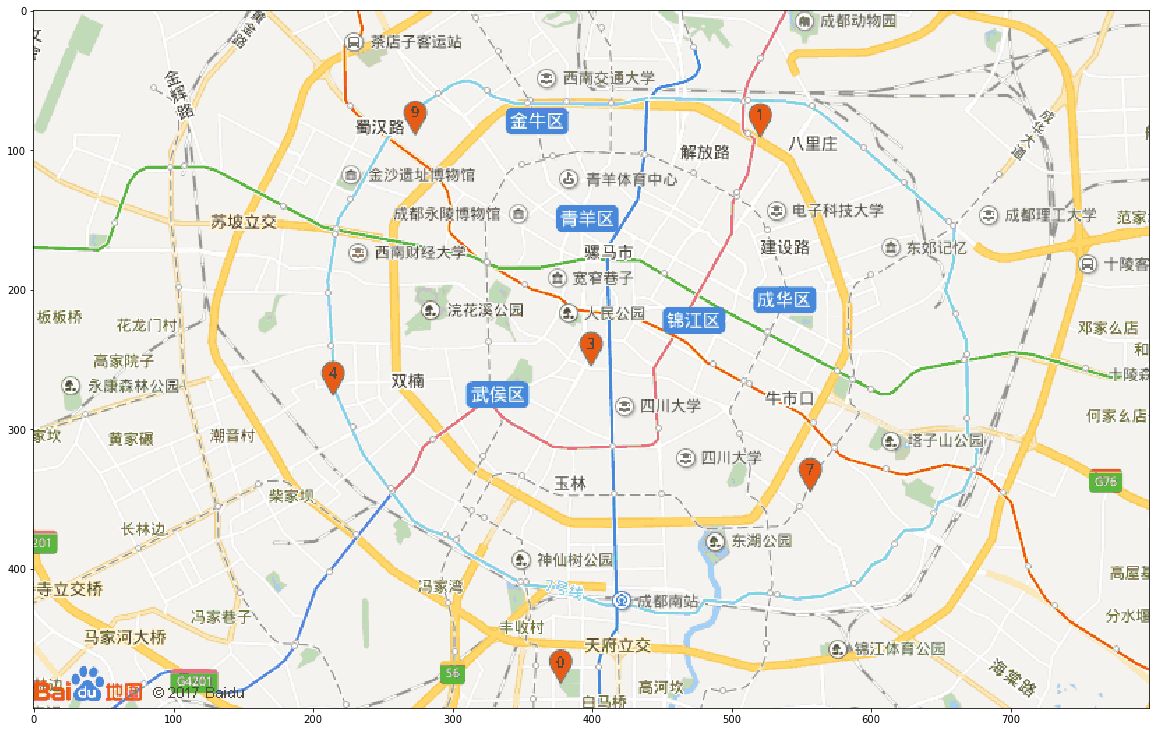

In [153]:
# show the region where more cluster exist
center1 = '&center='+str(kmResult[3][1])+','+str(kmResult[3][0])
markers1 = '&markers='
markerStyles1 = '&markerStyles='
for i in range(10):
    markers1 = markers1 + str(kmResult[i][1])+','+str(kmResult[i][0])
    markerStyles1 = markerStyles1 + 'm,'+str(i)
    if i != 9:
        markers1 = markers1+'|'
        markerStyles1 = markerStyles1+'|'
# img_src = 'http://api.map.baidu.com/staticimage/v2?ak=6scPy4KLKcvtThBln8ZhWkanzxgILImw&mcode=666666&width=700&height=400&zoom=12'+center+markers+markerStyles
img_src = 'http://api.map.baidu.com/staticimage/v2?ak=6scPy4KLKcvtThBln8ZhWkanzxgILImw&mcode=666666&width=800&height=500&zoom=13'+center1+markers1+markerStyles1
plt.figure(figsize=(20,15))
plt.figure(1) 
image = io.imread(img_src)
plt.imshow(image)
plt.show()

## Plot the data
Extract the TID data along with the region it appeared in different hours.

In [111]:
#extract hour from time
t = X[:,3]
# str(t)[0:2]
hour = np.floor(t/10000).astype(int)

In [112]:
X[:,0].shape

(814180,)

In [113]:
XResult = pd.DataFrame({'TID': X[:,0].astype(int),'hour':hour,'region':kmLabels})
XResult.head(5)

,TID,hour,region
0,1,21,7
1,1,21,7
2,1,21,7
3,1,21,7
4,1,21,7


Plot the total number of taxis vs. the time. We can see the rush hour periods of the day.

In [114]:
#sort by hour
grouped_h = XResult.groupby(['hour'])
h_count = grouped_h.agg('count')
# print(h_count.shape)  #(18, 2)
h_sort = h_count.sort_values(['TID'],ascending=False)
# h_sort.columns
h_sort.index

Int64Index([14, 21, 15, 20, 17, 11, 18, 22, 13, 16, 10, 12, 19, 9, 23, 8, 7,
            6],
           dtype='int64', name='hour')

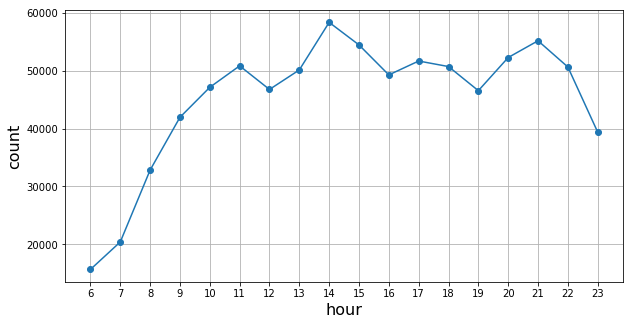

In [194]:
#plot by hour
plt.figure(figsize=(10,5))
plt.figure(1) 
plt.plot(h_count.index,h_count['TID'],'o-')
plt.grid()
plt.xticks((h_count.index))
plt.xlabel('hour', fontsize=16)
plt.ylabel('count', fontsize=16)

Plot the total number of taxis vs. the region. We can see the traffic hotspots in the city.

In [116]:
#sort by region
grouped_r = XResult.groupby(['region'])
r_count = grouped_r.agg('count')
# print(r_count.shape)  (10, 2)
r_count.sort_values(['TID'],ascending=False)

,TID,hour
region,,
3,224901,224901
4,143967,143967
7,124218,124218
0,103257,103257
9,97897,97897
1,80510,80510
5,24849,24849
6,8038,8038
2,3491,3491


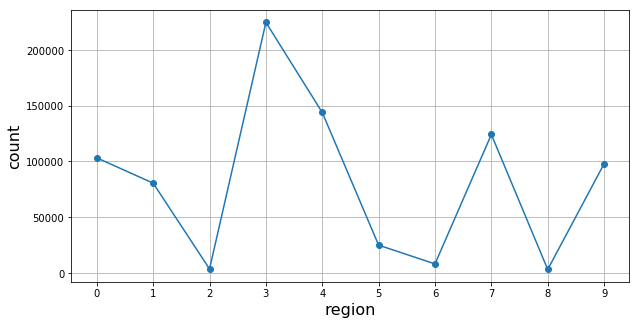

In [193]:
#plot by region
plt.figure(figsize=(10,5))
plt.figure(1) 
plt.plot(r_count.index,r_count['TID'],'o-')
plt.grid()
plt.xticks((r_count.index))
plt.xlabel('region', fontsize=16)
plt.ylabel('count', fontsize=16)


Print the top 20 regions and times with the largest average hourly traffic.

In [118]:
#sort by region & hour
grouped_r_h = XResult.groupby(['hour','region'])
r_h_count = grouped_r_h.agg('count')
# r_h_count.shape  (172, 1)
r_h_sort = r_h_count.sort_values(['TID'],ascending=False)
r_h_sort.nlargest(n=20,columns='TID')

,,TID
hour,region,
14,3,18327
15,3,17934
13,3,15600
21,3,14989
20,3,14762
17,3,14693
16,3,14320
11,3,13797
22,3,13731
